# Yield Curves In Quandl Data

Documentation at: https://data.nasdaq.com/data/YC-global-yield-curves/documentation

### Preliminaries

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
#import seaborn as sns


### Different download techniques are available

In [3]:
raw_data = quandl.get('YC/NZL', start_date='2011-01-01', 
                      end_date='2021-01-25', returns="pandas",
                     api_key=BrianBoonstraPrivateKeys['Quandl'])


In [4]:
raw_data.tail().transpose()

Date,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-25
1-Month,0.26,0.26,0.26,0.26,0.26
2-Month,0.27,0.27,0.27,0.28,0.28
3-Month,0.29,0.29,0.28,0.29,0.29
1-Year,NaN,NaN,NaN,NaN,NaN
2-Year,0.20,0.19,0.21,0.23,0.18
5-Year,0.37,0.36,0.38,0.40,0.37
10-Year,1.01,1.01,1.04,1.07,1.06


<AxesSubplot:xlabel='Date'>

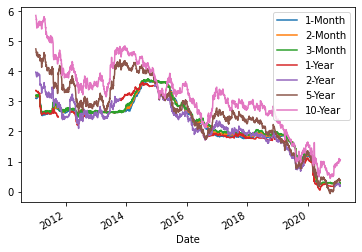

In [5]:
raw_data.plot()

<AxesSubplot:xlabel='Date'>

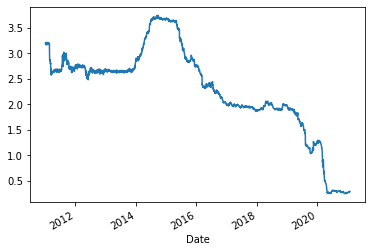

In [6]:
raw_data['3-Month'].plot()

            Rate
Date            
2021-01-19  0.29
2021-01-20  0.29
2021-01-21  0.28
2021-01-22  0.29
2021-01-25  0.29


<AxesSubplot:xlabel='Date'>

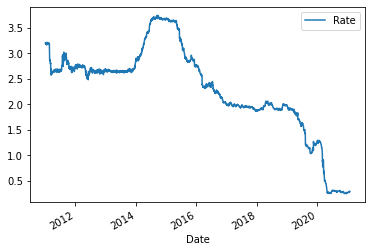

In [8]:
m3 = quandl.get('YC/NZL3M', start_date='2011-01-01', 
                      end_date='2021-01-25', returns="pandas",
                     api_key=BrianBoonstraPrivateKeys['Quandl'])
print(m3.tail())
m3.plot()

In [13]:
(m3['Rate'] - raw_data['3-Month']).describe()

count    2526.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

## The United Kingdom Has Some Special Data

In [15]:
UK_OIS = quandl.get('YC/GBR_ISSC', start_date='2011-01-01', 
                      end_date='2021-01-25', returns="pandas",
                     api_key=BrianBoonstraPrivateKeys['Quandl'])

In [16]:
UK_OIS.iloc[[0,1,2,-3,-2,-1]].transpose()

Date,2011-01-04,2011-01-05,2011-01-06,2021-01-21,2021-01-22,2021-01-25
0.08Y,0.518717,0.520205,0.519765,0.045339,0.044609,0.046329
0.17Y,0.523269,0.527588,0.527575,0.041536,0.040812,0.041132
0.25Y,0.530267,0.536720,0.538718,0.037045,0.036360,0.034565
0.33Y,0.539333,0.548527,0.552796,0.031523,0.030771,0.027967
0.42Y,0.550050,0.562668,0.568531,0.025535,0.024654,0.021511
0.5Y,0.561811,0.578294,0.584933,0.019565,0.018543,0.015263
0.58Y,0.574283,0.594720,0.601572,0.013818,0.012635,0.009220
0.67Y,0.587411,0.611663,0.618460,0.008325,0.006963,0.003366
0.75Y,0.601283,0.629175,0.635860,0.003053,0.001507,-0.002313
0.83Y,0.616076,0.647505,0.654133,-0.002035,-0.003750,-0.007832
